# Задание
Возьмите датасет Mortality and Water Hardnesshttps://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

### 1.Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
- 1.1 Построить точечный график
- 1.2 Рассчитать коэффициенты корреляции Пирсона и Спирмена
- 1.3 Построить модель линейной регрессии
- 1.4 Рассчитать коэффициент детерминации
- 1.5 Вывести график остатков

### 2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- 2.1 Разделить данные на 2 группы
- 2.2 Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


___
## Решение

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# нужный датасет встроен в библиотеку sklearn
free_water = pd.read_csv('https://raw.githubusercontent.com/ant69/pandas_statistic/main/water.csv')

In [5]:
free_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [14]:
free_water.describe()
# В датасете всего 61 строка, т.е. данных относительно мало. Это снижает надежность последующих оценок

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

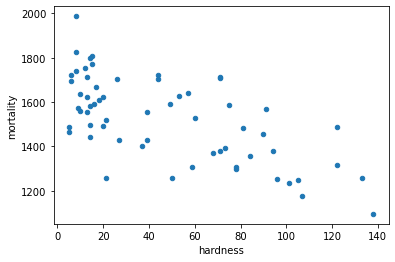

In [8]:
# 1.1 Смотрим, как "ложатся" данные по жесткости воды (ось x) и уровню годовой смертности (ось y)
free_water.plot(kind='scatter', x='hardness', y='mortality')

# Первое впечатление после просмотра диаграммы - присутствует обратная корреляция. Будем проверять :)

In [9]:
# 1.2 Считаем коэффициенты корреляции 
# Пирсона
free_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:

# Спирмана
free_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
# Заодно смотрим коэффициент по Кендаллу
free_water[['hardness', 'mortality']].corr(method='kendall')

# Пока ощущение присутствия обратной корреляции скорее подтверждается

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [12]:
# 1.3 Займемся построением модели регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# Будем строить регрессионную модель, которая позволит по уровню жесткости воды строить прогноз по уровню смертности
X = free_water[['hardness']]
y = free_water['mortality']

In [15]:
# Поскольку в датасете всего 61 строка, оставим для тестовой выборки 20 процентов строк (всего 12 или 13 - далее проверим)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
# Проверяем размерность "тренировочного" набора данных
X_train.shape

(48, 1)

In [17]:
# Создаем модель и "тренируем" её на наших немногочисленных данных
mortal_water = LinearRegression()
mortal_water.fit(X_train, y_train)

LinearRegression()

In [20]:
# Смотрим на коэффициенты полученной модели линейной регрессии
print(mortal_water.coef_)
print(mortal_water.intercept_)
# -3.55 определяет отрицательный угол наклона прямой, а 1691 - уровень смертности при нулевой жесткости воды

[-3.55069083]
1691.1393811574978


In [28]:
# Предскажем значения, а потом сравним предсказанные и реальные данные (слегка их округлив)
y_pred = mortal_water.predict(X_test)
print(y_pred.round(0))
print(y_test.tolist())
# Если честно, результаты - так себе

[1670. 1645. 1673. 1425. 1645. 1634. 1219. 1670. 1333. 1372. 1368. 1645.
 1641.]
[1696, 1711, 1466, 1587, 1557, 1591, 1259, 1724, 1236, 1456, 1569, 1625, 1495]


In [29]:
# 1.4 Рассчитаем коэффициент детерминации
mortal_water.score(X_test, y_test)

0.4161677592825127

Судя по тексту, найденному здесь http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8,
в нашем случае модель получилась так себе. Ниже - цитата:

«Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%). Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими (коэффициент корреляции превышает 90%). Равенство коэффициента детерминации единице означает, что объясняемая переменная в точности описывается рассматриваемой моделью.»

(array([ 1.,  1.,  6., 13., 10.,  7.,  9.,  9.,  2.,  3.]),
 array([-356.57487368, -288.49077176, -220.40666985, -152.32256793,
         -84.23846601,  -16.15436409,   51.92973783,  120.01383974,
         188.09794166,  256.18204358,  324.2661455 ]),
 <BarContainer object of 10 artists>)

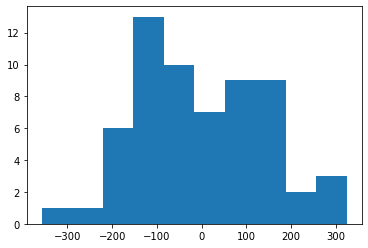

In [70]:
# 1.5 Выведем график остатков
# Вначале подсчитаем по каждому городу выборки предсказанную смертность для текущей жесткости
y_all_pred = mortal_water.predict(X)
# Считаем разность между предсказанным и реальным значениями смертности
y_dif = y.tolist() - y_all_pred
# Смотрим диаграмму распределения остатков
plt.hist(y_dif)

# Учитывая количество данных в выборке можно сравнить получившееся распредление с нормальным, но с некоторой натяжкой.

## Вторая часть
То же самое, но отдельно для северных и южных городов

In [45]:
# Вначале разделяем данные и смотрим на получившиеся выборки
northern_towns = free_water[free_water.location == 'North']
print(northern_towns.head())
print(northern_towns.describe())
southern_towns = free_water[free_water.location == 'South']
print(southern_towns.head())
print(southern_towns.describe())

   Unnamed: 0 location        town  mortality  hardness
1           2    North  Birkenhead       1668        17
3           4    North   Blackburn       1800        14
4           5    North   Blackpool       1609        18
5           6    North      Bolton       1558        10
6           7    North      Bootle       1807        15
       Unnamed: 0    mortality   hardness
count   35.000000    35.000000  35.000000
mean    30.742857  1633.600000  30.400000
std     17.254740   136.936911  26.134494
min      2.000000  1378.000000   6.000000
25%     17.500000  1557.500000  12.500000
50%     30.000000  1637.000000  17.000000
75%     45.500000  1718.000000  44.000000
max     61.000000  1987.000000  94.000000
    Unnamed: 0 location         town  mortality  hardness
0            1    South         Bath       1247       105
2            3    South   Birmingham       1466         5
7            8    South  Bournemouth       1299        78
9           10    South     Brighton       1359       

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

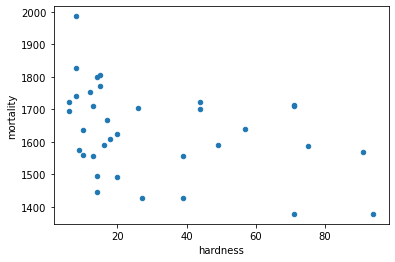

In [46]:
# Северных городов 35. Смотрим, как распределяются данные по жесткости воды и смертности для них
# 1.1 Жесткость воды (ось x) vs уровень годовой смертности (ось y)
northern_towns.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

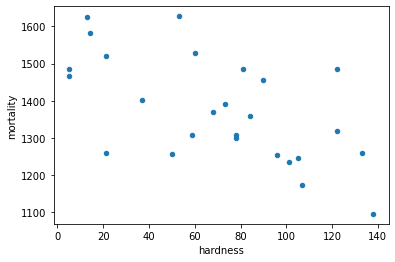

In [47]:
# Южных городов 26. Смотрим, как распределяются данные по жесткости воды и смертности для них
# 1.1 Жесткость воды (ось x) vs уровень годовой смертности (ось y)
southern_towns.plot(kind='scatter', x='hardness', y='mortality')

In [48]:
# Сравнивая графики распределения точек для этих двух выборок заметно, что для южных городов уровень смертности ниже 
# (хотя кажется, что "рой" точек висит выше, но по шкале y видно, что єти точки в среднем ниже точек для северных городов)
# Так же видно, что для южных городов линия для регрессии будет иметь больший угол наклона и линия просматривается более явно.
# Но в обоих случаях разброс точек довольно заметный.

In [54]:
# 1.2 Считаем коэффициенты корреляции Пирсона и Спирмена для обоих распределений
south_pirson = southern_towns[['hardness', 'mortality']].corr()
south_spearman = southern_towns[['hardness', 'mortality']].corr(method='spearman')
north_pirson = northern_towns[['hardness', 'mortality']].corr()
north_spearman = northern_towns[['hardness', 'mortality']].corr(method='spearman')
print(f'Юг, Пирсон = {south_pirson}')
print(f'Юг, Спирмен = {south_spearman}')
print(f'Север, Пирсон = {north_pirson}')
print(f'Север, Спирмен = {north_spearman}')
# Действительно видим более ярко заметную зависимость для южных городов

Юг, Пирсон =            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Юг, Спирмен =            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
Север, Пирсон =            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Север, Спирмен =            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [56]:
# 1.3 Займемся построением модели регрессии для обоих выборок
# Будем строить регрессионную модель, которая позволит по уровню жесткости воды строить прогноз по уровню смертности
# Поскольку в этот раз выборки еще меньше, сохраним соотношение 80 к 20 для тренировочных и тестовых данных
# Сразу же выведем по обоим выборкам получившиеся в результате "обучения" коэффициенты регрессионных прямых
X_s = southern_towns[['hardness']]
y_s = southern_towns['mortality']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.20, random_state=1)
mortal_w_s = LinearRegression()
mortal_w_s.fit(X_s_train, y_s_train)
print("Южные города", mortal_w_s.coef_, mortal_w_s.intercept_)

X_n = northern_towns[['hardness']]
y_n = northern_towns['mortality']
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.20, random_state=1)
mortal_w_n = LinearRegression()
mortal_w_n.fit(X_n_train, y_n_train)
print("Северные города", mortal_w_n.coef_, mortal_w_n.intercept_)

# Неожиданно для себя увидел, что "угол наклона" у распределения для северных городов оказался круче, чем у южных.
# Очевидно, это получилось за счет довольно плотной группировки северных городов в левой средней части соотв. диаграммы

Южные города [-1.805185] 1506.412358227419
Северные города [-3.03621883] 1714.073409633743


In [58]:
# Оценим точность предсказаний.
# Вначале - южные города:
y_s_pred = mortal_w_s.predict(X_s_test)
print(y_s_pred.round(0))
print(y_s_test.tolist())

[1324. 1400. 1344. 1355. 1398. 1257.]
[1236, 1309, 1456, 1359, 1527, 1096]


In [59]:
# Теперь - северные города:
y_n_pred = mortal_w_n.predict(X_n_test)
print(y_n_pred.round(0))
print(y_n_test.tolist())

[1438. 1580. 1684. 1499. 1653. 1486. 1696.]
[1569, 1702, 1558, 1713, 1625, 1587, 1696]


In [60]:
# В обоих случаях разброс предсказанных и реальных значений не кажется идеальным, но если "танцевать" от абсолютных значений
# предсказываемых чисел, то ошибка лежит в пределах 15 процентов. Наверное, лучше - так, чем "пальцем в небо" :)

In [63]:
# 1.4 Сравним коэффициенты детерминации для этих двух выборок
print('Юг:')
print(mortal_w_s.score(X_s_test, y_s_test))
print('Север:')
print(mortal_w_n.score(X_n_test, y_n_test))

Юг:
0.4042268538320487
Север:
-2.881919491832517


In [ ]:
# Коэффициент детерминации для северных городов показывает, что лучше "пальцем в небо", 
# а для южных городов какой-то смысл в полученной регрессионной модели есть

Южные города


(array([1., 3., 2., 4., 5., 3., 1., 4., 1., 2.]),
 array([-208.50347332, -166.02688133, -123.55028934,  -81.07369736,
         -38.59710537,    3.87948662,   46.3560786 ,   88.83267059,
         131.30926257,  173.78585456,  216.26244655]),
 <BarContainer object of 10 artists>)

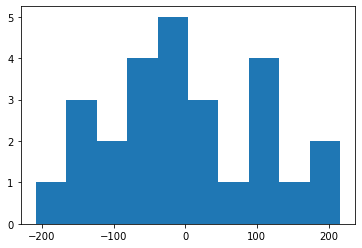

In [71]:
# 1.5 Посмотрим графики остатков
print('Южные города')
# Вначале подсчитаем по каждому городу выборки предсказанную смертность для текущей жесткости
y_s_all_pred = mortal_w_s.predict(X_s)
# Считаем разность между предсказанным и реальным значениями смертности
y_s_dif = y_s.tolist() - y_s_all_pred
# Смотрим диаграмму распределения остатков
plt.hist(y_s_dif)


Северные города


(array([3., 3., 4., 5., 4., 4., 8., 1., 2., 1.]),
 array([-227.56634594, -175.08807724, -122.60980855,  -70.13153985,
         -17.65327115,   34.82499755,   87.30326625,  139.78153495,
         192.25980365,  244.73807235,  297.21634105]),
 <BarContainer object of 10 artists>)

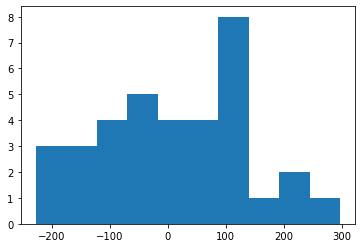

In [72]:
print('Северные города')
# Вначале подсчитаем по каждому городу выборки предсказанную смертность для текущей жесткости
y_n_all_pred = mortal_w_n.predict(X_n)
# Считаем разность между предсказанным и реальным значениями смертности
y_n_dif = y_n.tolist() - y_n_all_pred
# Смотрим диаграмму распределения остатков
plt.hist(y_n_dif)


In [ ]:
# Общий вывод по распределению остатков - сложно оценивать эффективность модели при небольшом объеме выборки,